# Big Mart Sales Prediction

<img src="Big_Mart.jpg" style="width:600px;height:400px"/>

## Problem statement
BigMart, a big retail company, collected sales data in 2013 from 10 stores in different cities. They looked at 1559 products and gathered information about each product and store. The goal is to build a model that can predict how much each product will sell at each store.

By using this model, BigMart wants to understand which product and store characteristics have the most impact on sales. This will help them make smarter decisions and strategies to increase their sales and revenue.

## Data Atrributes:
| Item_Identifier          | Unique product ID                                          |
| ------------------------|------------------------------------------------------------|
| Item_Weight              | Weight of product                                          |
| Item_Fat_Content        | Whether the product is low fat or not                      |
| Item_Visibility          | The % of total display area of all products in a store     |
| Item_Type                 | The category to which the product belongs                  |
| Item_MRP                 | Maximum Retail Price (list price) of the product           |
| Outlet_Identifier         | Unique store ID                                            |
| Outlet_Establishment_Year | The year in which the store was established                |
| Outlet_Size               | The size of the store in terms of ground area covered      |
| Outlet_Location_Type    | The type of city in which the store is located             |
| Outlet_Type              | Whether the outlet is a grocery store or a supermarket     |
| Item_Outlet_Sales        | Sales of the product in the particular store               |


# Let's Understand the Data

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns      
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
df = pd.read_csv('train_bigmart.csv')

In [96]:
df

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15     0.282525         0.016047  0.927507   
1              DRC01     0.081274         0.019278  0.072068   
2              FDN15     0.770765         0.016760  0.468288   
3              FDX07     0.871986         0.022911  0.640093   
4              NCD19     0.260494         0.016164  0.095805   
...              ...          ...              ...       ...   
8518           FDF22     0.137541         0.056783  0.777729   
8519           FDS36     0.227746         0.046982  0.326263   
8520           NCJ29     0.359929         0.035186  0.228492   
8521           FDN46     0.158083         0.145221  0.304939   
8522           DRG01     0.610003         0.044878  0.187510   

     Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  \
0               OUT049                       1999                     0   
1               OUT018                       2009                     2   
2               OUT049                       1999                     0   
3               OUT010                       1998                     2   
4               OUT013                       1987                     2   
...                ...                        ...                   ...   
8518            OUT013                       1987                     2   
8519            OUT045                       2002                     1   
8520            OUT035                       2004                     1   
8521            OUT018                       2009                     2   
8522            OUT046                       1997                     0   

      Item_Outlet_Sales   New_Item_Type  Outlet_Years  ...  \
0              8.225540            Food      0.416667  ...   
1              6.094524          Drinks      0.000000  ...   
2              7.648392            Food      0.416667  ...   
3              6.596300            Food      0.458333  ...   
4              6.902446  Non-Consumable      0.916667  ...   
...                 ...             ...           ...  ...   
8518           7.929625            Food      0.916667  ...   
8519           6.308617            Food      0.291667  ...   
8520           7.084322  Non-Consumable      0.208333  ...   
8521           7.520558            Food      0.000000  ...   
8522           6.640751          Drinks      0.500000  ...   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   1                      0   
4                                   0                      0   
...                               ...                    ...   
8518                                0                      0   
8519                                0                      0   
8520                                0                      0   
8521                                0                      0   
8522                                0                      0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                                0                    0               0   
1                                0                    0               0   
2                                0                    0               1   
3                                0                    0               0   
4                                0                    1               0   
...                            ...                  ...             ...   
8518                             0                    0               0   
8519                             0                    0               0   
8520                             1                    0               0   
8521                             0                    0               0

In [4]:
# Lets check the shape of the dataset
df.shape

(8523, 12)

In [5]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# let's look at the statistical aspects of the dataframe
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Observations:
1. The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

In [7]:
# check unique values in dataset
df.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Columns containing many unique values are of numerical type. The remaining are of categorical type.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


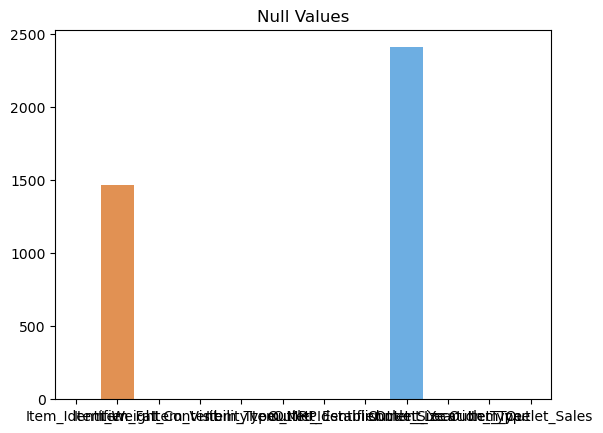

In [8]:
# Checking for NULLs in the data
Null=df.isnull().sum()
print(Null)
# Let's vizualize the Null values
sns.barplot(x=df.columns,y=Null)
plt.title('Null Values')
plt.show()

In [9]:
# checking categorical attributes
categorical = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
print(categorical)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [10]:
# We can eliminate a few columns like 'Item_Identifier' and 'Outlet_Identifier'.
categorical.remove('Item_Identifier')
categorical.remove('Outlet_Identifier')
print(categorical)

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
# Let's print the value_count of categorical columns
for j in categorical:
    print(j)
    print(df[j].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

Item fat content contains some mis code values.

In [12]:
# Checking Duplicate values in the dataset
df.duplicated().sum()

0

In [13]:
# Item fat content contains some mis code values.
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'}}, inplace=True)

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# Checking Item Visibility as it cannot be zero
sum(df['Item_Visibility']==0)

526

In [16]:
# Replacing Item Visibility value zero with Null 
df['Item_Visibility'].replace(0,np.nan,inplace=True)

In [17]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
Item_Visibility_mean = df.groupby('Item_Identifier')['Item_Visibility'].mean()
Item_Visibility_mean

Item_Identifier
DRA12    0.047934
DRA24    0.048062
DRA59    0.153963
DRB01    0.082126
DRB13    0.008002
           ...   
NCZ30    0.029116
NCZ41    0.064529
NCZ42    0.011305
NCZ53    0.027775
NCZ54    0.093831
Name: Item_Visibility, Length: 1559, dtype: float64

In [19]:
df['Item_Visibility'] = df['Item_Visibility'].fillna(df['Item_Identifier'].map(Item_Visibility_mean))

In [20]:
sum(df['Item_Visibility']==0)

0

In [21]:
# Creation of New Attributes
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [22]:
# Creating New Atrribute from Item_Identifier
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
# After creating a new attribute, let's fill in some meaningful value in it.
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

We have three categories of (Food, Non-Consumables and Drinks).

We will use this 'Non_Consumable' category to represent the 'Fat_Content' which will be 'Non-Edible'.

In [24]:
# Filling Null Values in Item Weight
item_weight_mean = df.groupby('Item_Identifier')['Item_Weight'].mean()
item_weight_mean

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [25]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(item_weight_mean))

In [26]:
df['Item_Weight'].isna().sum()

4

In [27]:
df[df['Item_Weight'].isna()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
927       Medium               Tier 3  Supermarket Type3          1569.9564   
1922      Medium               Tier 3  Supermarket Type3          4434.2280   
4187      Medium               Tier 3  Supermarket Type3          3453.5046   
5022       Small               Tier 1      Grocery Store           120.5098   

     New_Item_Type  
927           Food  
1922          Food  
4187          Food  
5022          Food

In [28]:
Item_Weight_mean = df['Item_Weight'].mean()
print(Item_Weight_mean)
df['Item_Weight'].fillna(value=Item_Weight_mean, inplace=True)

12.875420237117032


In [29]:
df['Item_Weight'].isna().sum()

0

In [30]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [31]:
# Filling Null Values in Outlet Size
outlet_size_mode = df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])
outlet_size_mode

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [32]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Type'].map(outlet_size_mode))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
New_Item_Type                0
dtype: int64


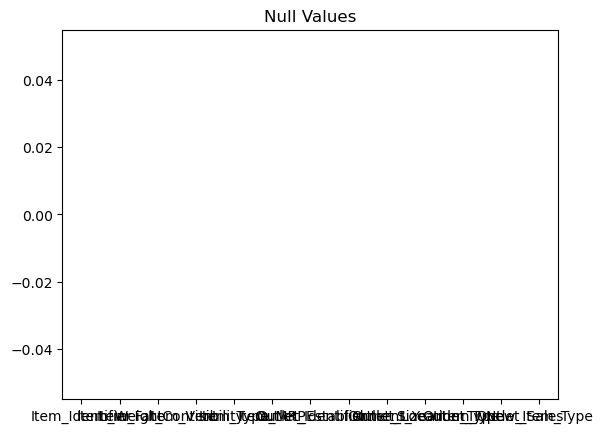

In [33]:
# Checking for NULLs in the data
Null=df.isnull().sum()
print(Null)
# Let's vizualize the Null values
sns.barplot(x=df.columns,y=Null)
plt.title('Null Values')
plt.show()

In [34]:
# Using this 'Non_Consumable' category to represent the 'Fat_Content' which will be 'Non-Edible'.
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [35]:
# Creating small values for establishment year
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [36]:
df['Outlet_Years']

0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Outlet_Years, Length: 8523, dtype: int64

In [37]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.022911   
4           NCD19         8.93       Non-Edible         0.016164   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1          3735.1380            Food            24  
1  Supermarket Type2           443.4228          Drinks            14  
2  Supermarket Type1          2097.2700            Food            24  
3      Grocery Store           732.3800            Food            25  
4  Supermarket Type1           994.7052  Non-Consumable            36

# Exploratory Data Analysis

In [38]:
import plotly.express as px
import plotly.graph_objects as go

### Fat Content

In [39]:
# Storing the Item_Fat_Content value counts in a dict
Fat = df['Item_Fat_Content'].value_counts().to_dict()
# Plotting a pie chart
fat_pie=px.pie(df,values=Fat.values(),names=Fat.keys(),hole=0.4)
fat_pie.update_layout(title='Fat content',title_x=0.47)
fat_pie.update_traces(textinfo='percent+label')
fat_pie.show()

We see that about 64.7 % items are of low fat. This assumes that nearly half of customers are health conscious and prefer food with lower fat rating.

### Item Type

In [40]:
# Storing the Item_Type value counts in a dict
New_Item = df['New_Item_Type'].value_counts().to_dict()
# Plotting a pie chart
New_Item_pie=px.pie(df,values=New_Item.values(),names=New_Item.keys(),hole=0.4)
New_Item_pie.update_layout(title='Item content',title_x=0.47)
New_Item_pie.update_traces(textinfo='percent+label')
New_Item_pie.show()

Around 72% items in the store are under food category

### Item Type (Sub-Category)

In [41]:
# Storing the Item Type (Sub-Category) value counts in a Item dataframe
Item = df['Item_Type'].value_counts().reset_index()
Item.columns = ['Item_Type', 'Count']

# Plotting a bar chart
Item_bar = px.bar(Item, x='Item_Type', y='Count',color='Count', 
                 labels={'x': 'Item Type', 'y': 'Count'})

Item_bar.update_layout(title='Item Content (Sub Category)',title_x=0.47)
Item_bar.show()

From the above plot, we see that fruits and vegetables were the highest sold item followed closely by Snack foods

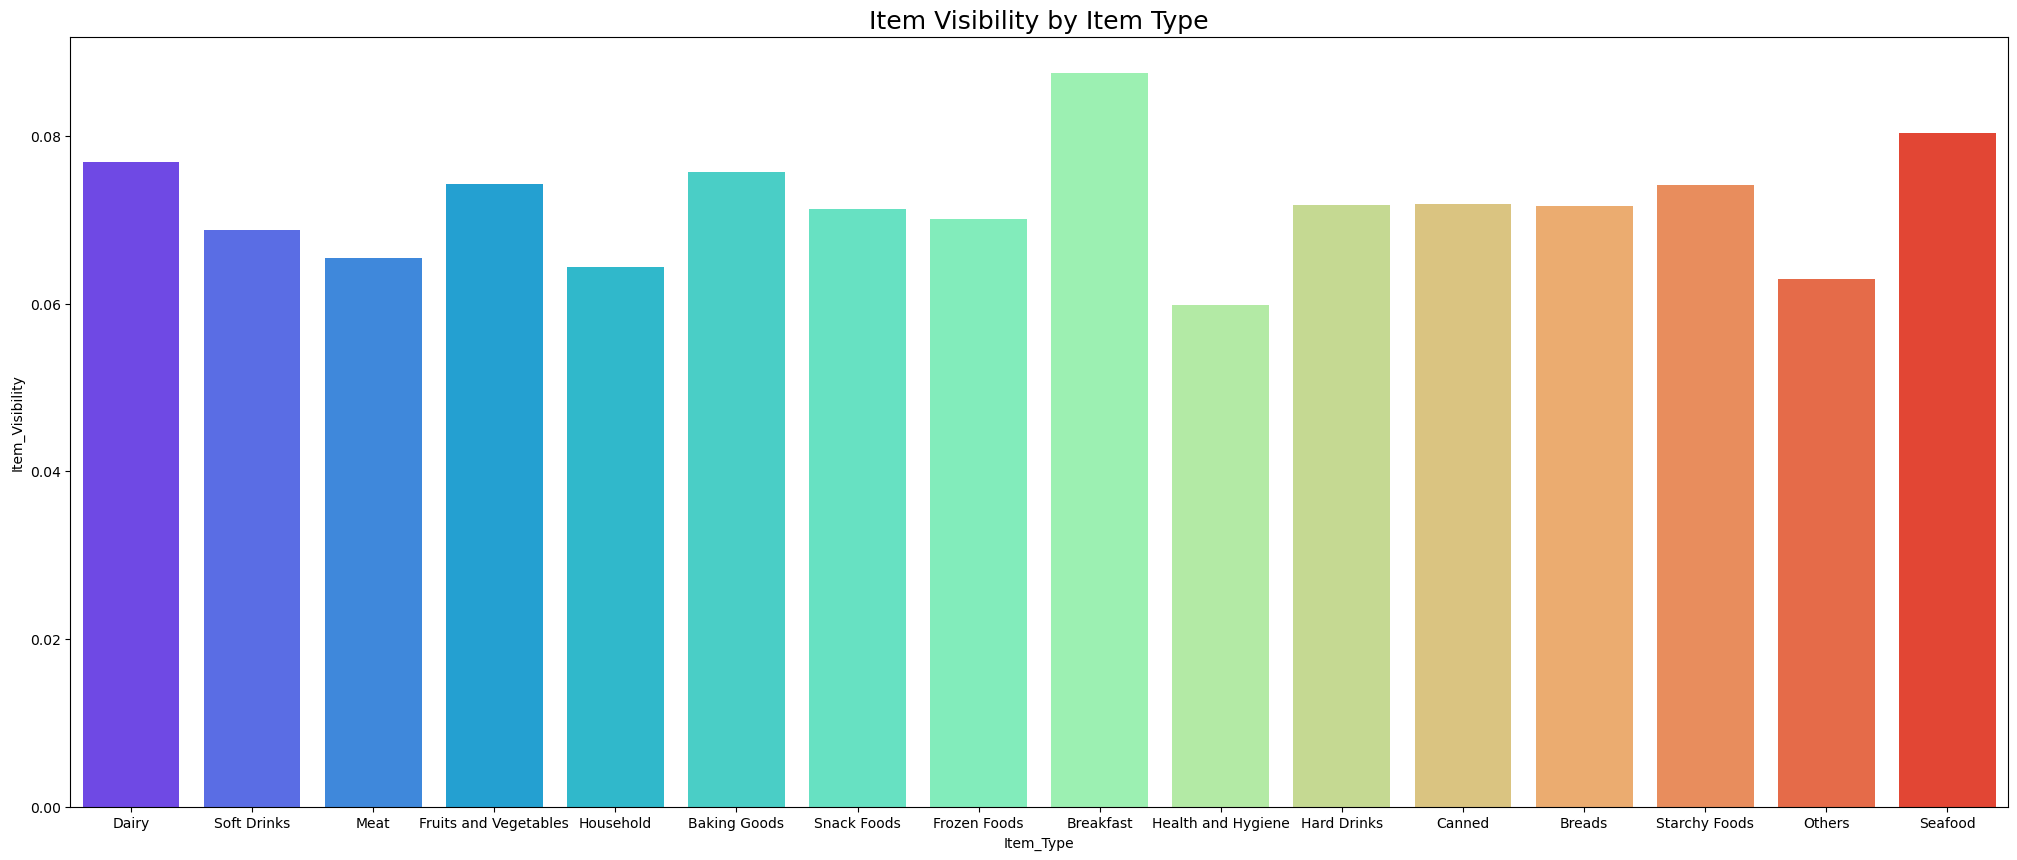

In [42]:
plt.figure(figsize=(25,10))
sns.barplot(x='Item_Type',y='Item_Visibility',data=df,palette='rainbow',ci=None)
plt.title('Item Visibility by Item Type', size= 18)
plt.show()

From the above plot, we see that Breakfast item type has the most item visibility.

### Item MRP

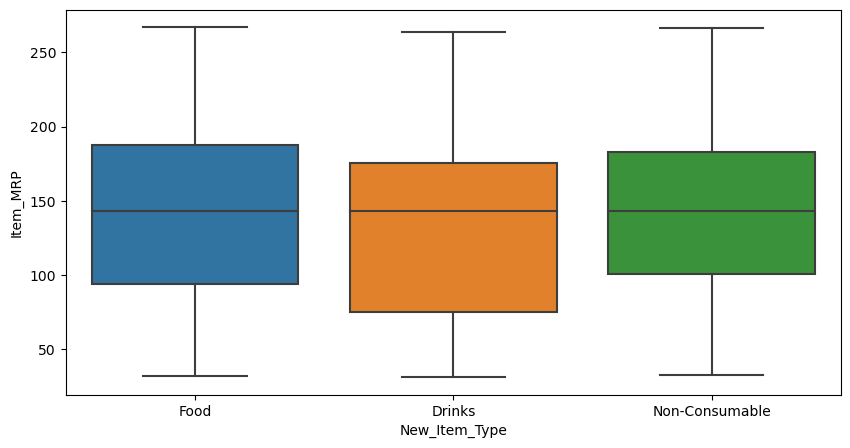

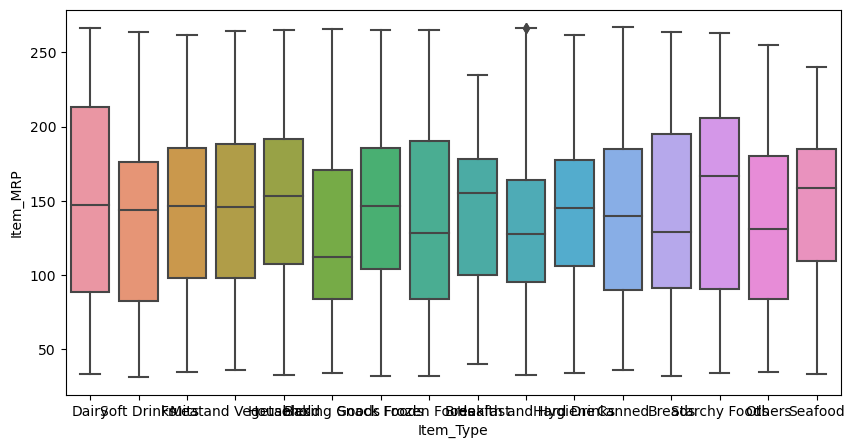

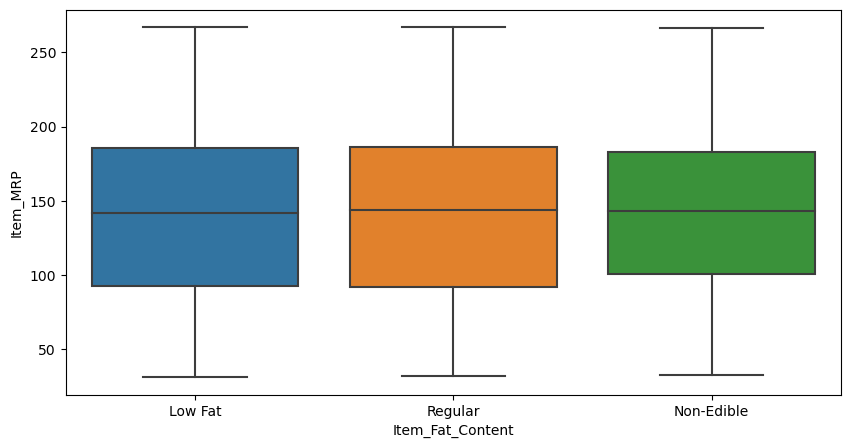

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x='New_Item_Type',y='Item_MRP',data=df)



plt.figure(figsize=(10,5))
sns.boxplot(x='Item_Type',y='Item_MRP',data=df)



plt.figure(figsize=(10,5))
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df)
plt.show()

In this boxplot comparison shows that Food category and Canned Item Type has the highest MRP

### Outlet Size and Location Type Distribution

In [45]:
df_counts = df.groupby(['Outlet_Size', 'Outlet_Location_Type']).size().reset_index(name='Count')
df_counts

Outlet_Size Outlet_Location_Type  Count
0        High               Tier 3    932
1      Medium               Tier 1    930
2      Medium               Tier 3   1863
3       Small               Tier 1   1458
4       Small               Tier 2   2785
5       Small               Tier 3    555

In [46]:
df_counts = df.groupby(['Outlet_Size', 'Outlet_Location_Type']).size().reset_index(name='Count')

fig23 = px.bar(df_counts, x='Outlet_Size', y='Count', color='Outlet_Location_Type',
             title='Outlet Size and Location Type Distribution')

fig23.update_layout(xaxis={'categoryorder':'total descending'},
                  title_x=0.5)
fig23.show()

The above count plot shows that the "Small" outlet size is present in all the locations and has the highest store count in comparison to "Medium" and "High."

### Outlet Establishment Year

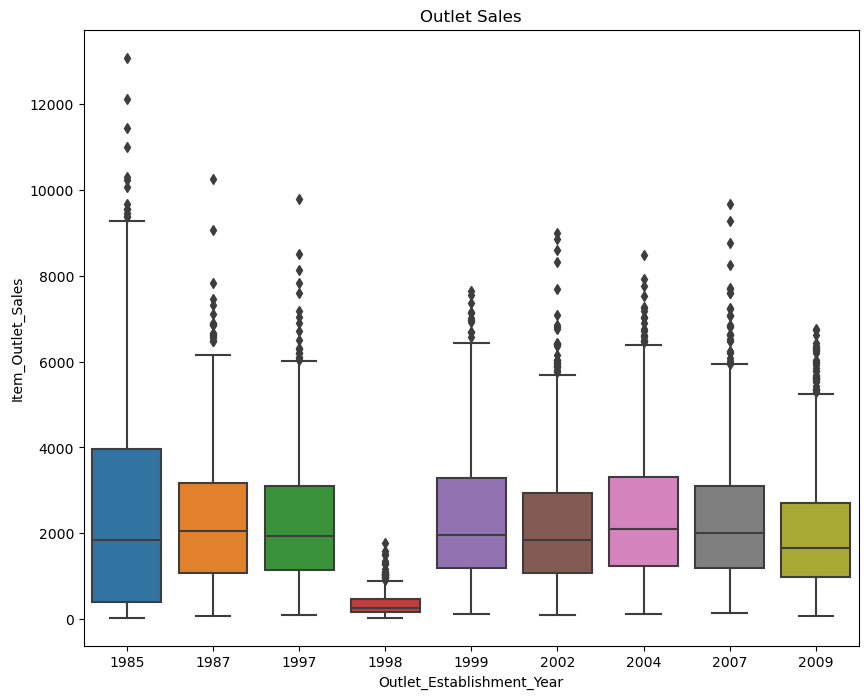

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Outlet_Establishment_Year'],y=df['Item_Outlet_Sales'])
plt.title('Outlet Sales')
plt.show()

As it can be seen, the sales reported by the older stores is higher than the relatively newer stores (except for the 1998 established store)

### Store type with location type

In [48]:
store=px.sunburst(df,path=['Outlet_Type','Outlet_Location_Type'],color_continuous_scale='RdBu')
store.update_layout(title='Store type with location type',title_x=0.5)
store.show()

As we can see, majoirty of the stores are of type 1 supermarket distributed over various location tiers.

Supermarket type 2 and 3 are confined to only tier 3 locations. Very small section of the stores are actually grocery stores.

Let us check how do these stores sell based on location tier using a boxplot.

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

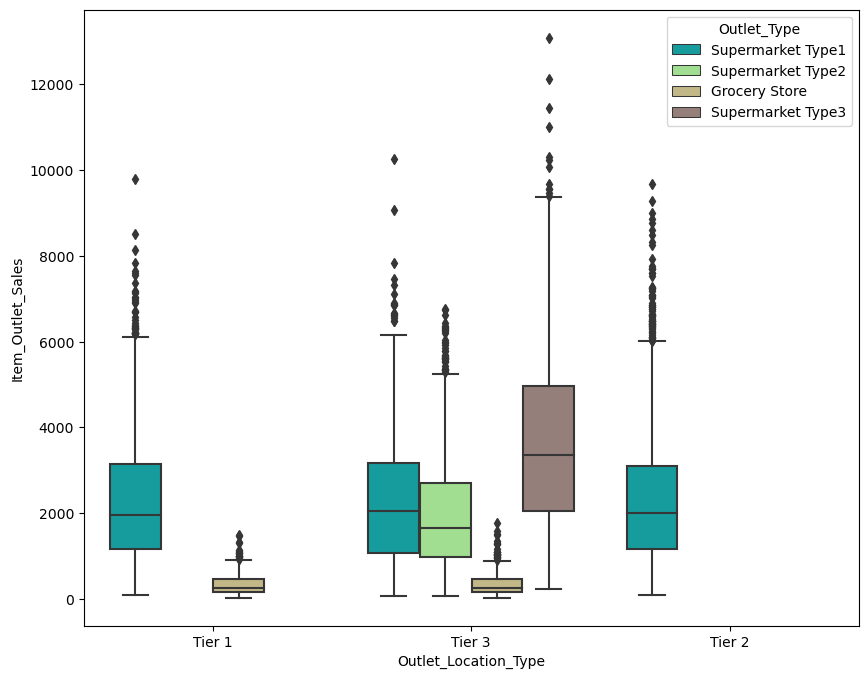

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=df,palette='terrain')

As we can see, tier 3 locations seem to be selling better than both tier 2 and tier 1. It is also to be noted that tier 3 has more number of stores in it. Hence, the sales are better too.

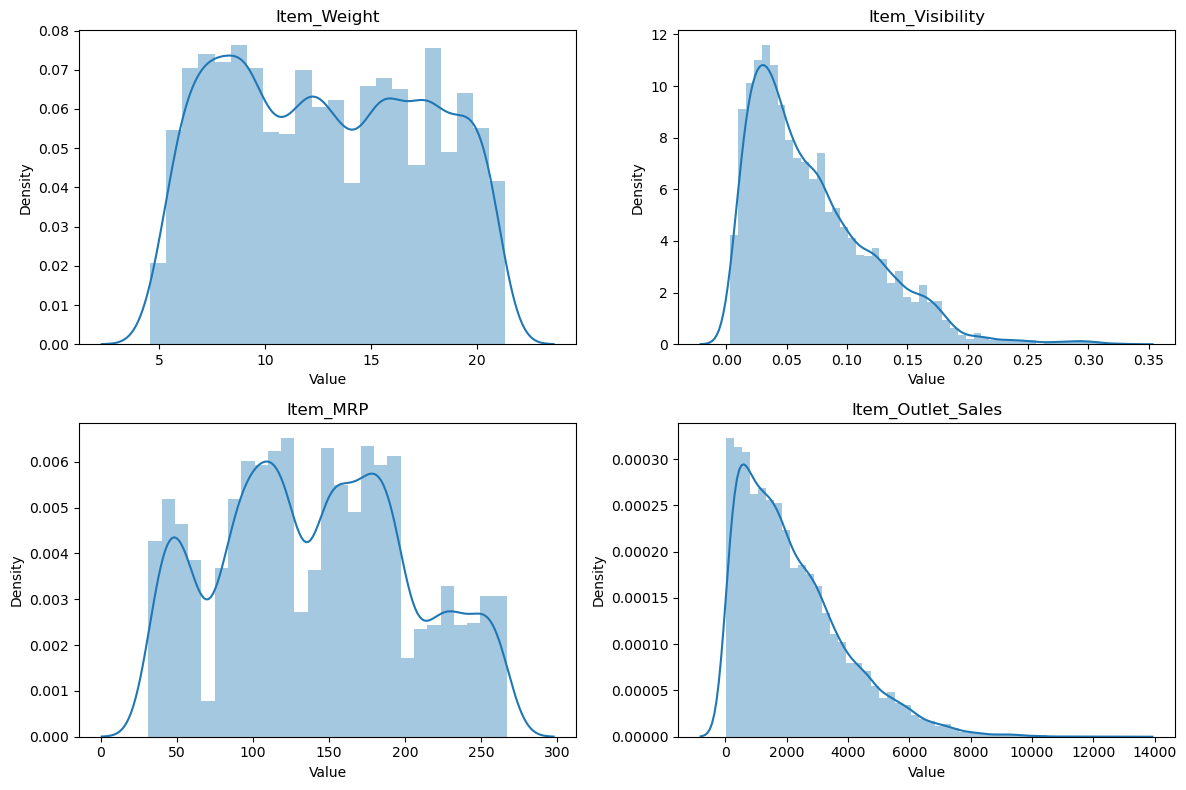

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

lst = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, col in enumerate(lst):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.distplot(df[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel('Value')
    axes[row_idx, col_idx].set_ylabel('Density')
    axes[row_idx, col_idx].set_title(col)

plt.tight_layout()
plt.show()

In [51]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.022911   
4           NCD19         8.93       Non-Edible         0.016164   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1          3735.1380            Food            24  
1  Supermarket Type2           443.4228          Drinks            14  
2  Supermarket Type1          2097.2700            Food            24  
3      Grocery Store           732.3800            Food            25  
4  Supermarket Type1           994.7052  Non-Consumable            36

In [52]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.013165
Item_Visibility             -0.126026
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Outlet_Years                 0.049135
Name: Item_Outlet_Sales, dtype: float64

<Axes: >

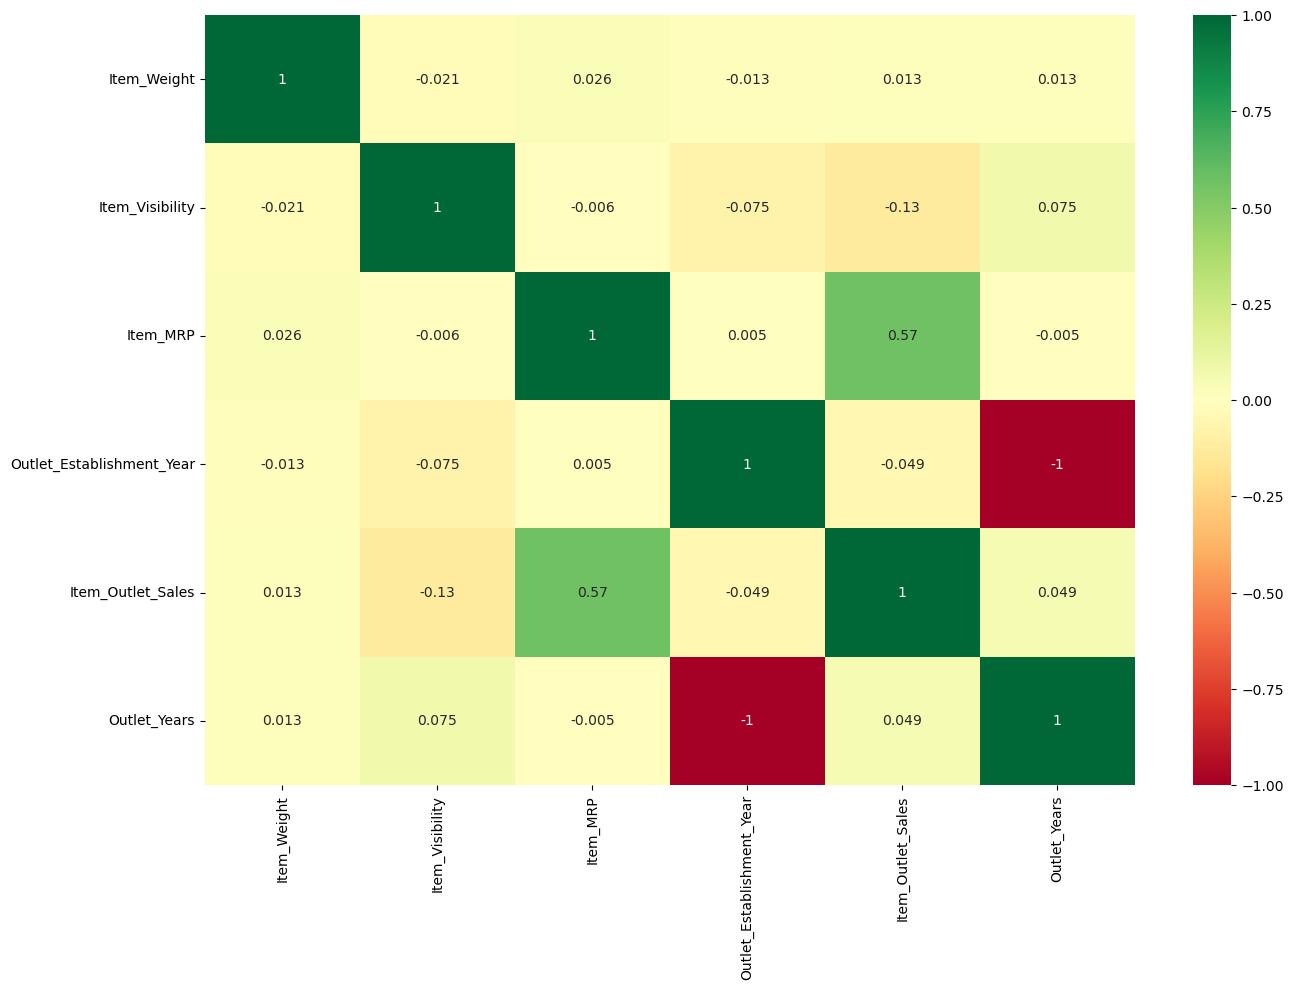

In [53]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, cmap = "RdYlGn", annot = True)

## Changing Categorical to Numerical

In [54]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
lst = ['Outlet_Size', 'Outlet_Location_Type']
for i in lst:
    df[i] = label.fit_transform(df[i])

In [55]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size','Outlet_Type','Item_Type'])
df.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP Outlet_Identifier  \
0           FDA15         9.30         0.016047  249.8092            OUT049   
1           DRC01         5.92         0.019278   48.2692            OUT018   
2           FDN15        17.50         0.016760  141.6180            OUT049   
3           FDX07        19.20         0.022911  182.0950            OUT010   
4           NCD19         8.93         0.016164   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Location_Type  Item_Outlet_Sales  \
0                       1999                     0          3735.1380   
1                       2009                     2           443.4228   
2                       1999                     0          2097.2700   
3                       1998                     2           732.3800   
4                       1987                     2           994.7052   

    New_Item_Type  Outlet_Years  ...  Item_Type_Fruits and Vegetables  \
0            Food            24  ...                                0   
1          Drinks            14  ...                                0   
2            Food            24  ...                                0   
3            Food            25  ...                                1   
4  Non-Consumable            36  ...                                0   

   Item_Type_Hard Drinks  Item_Type_Health and Hygiene  Item_Type_Household  \
0                      0                             0                    0   
1                      0                             0                    0   
2                      0                             0                    0   
3                      0                             0                    0   
4                      0                             0                    1   

   Item_Type_Meat  Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0               0                 0                  0                      0   
1               0                 0                  0                      0   
2               1                 0                  0                      0   
3               0                 0                  0                      0   
4               0                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  
0                      0                        0  
1                      1                        0  
2                      0                        0  
3                      0                        0  
4                      0                        0  

[5 rows x 36 columns]

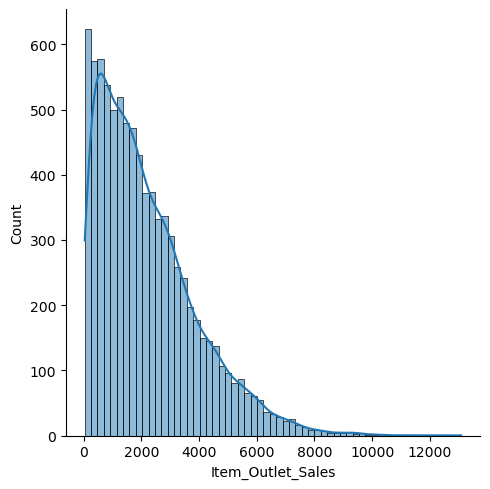

In [56]:
lst1 = ['Item_Outlet_Sales']
for j in lst1:
    sns.displot(df[j],kde=True)

In [67]:
# Using log transformation
for i in lst1:
    df[i] =np.log(df[i])

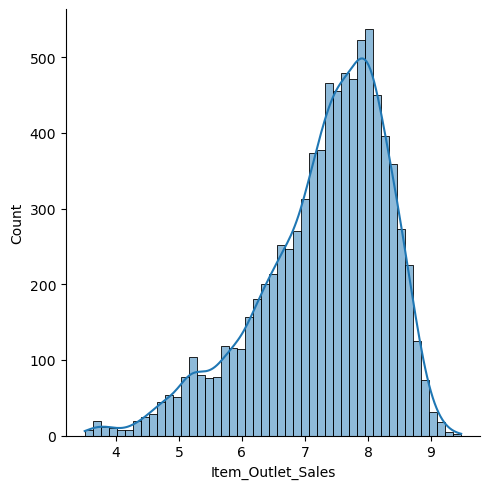

In [68]:
for v in lst1:
    sns.displot(df[v],kde=True)

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Item_MRP'] = scaler.fit_transform(df[['Item_MRP']])
df['Item_Weight'] = scaler.fit_transform(df[['Item_Weight']])
df['Outlet_Years'] = scaler.fit_transform(df[['Outlet_Years']])

In [70]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean      0.495411         0.070749     0.465635                1997.831867   
std       0.276571         0.050313     0.264327                   8.371760   
min       0.000000         0.003575     0.000000                1985.000000   
25%       0.251861         0.031395     0.265437                1987.000000   
50%       0.481989         0.058100     0.474209                1999.000000   
75%       0.732063         0.098867     0.655156                2004.000000   
max       1.000000         0.328391     1.000000                2009.000000   

       Outlet_Location_Type  Item_Outlet_Sales  Outlet_Years  \
count           8523.000000        8523.000000   8523.000000   
mean               1.112871           7.296540      0.465339   
std                0.812757           1.017108      0.348823   
min                0.000000           3.505257      0.000000   
25%                0.000000           6.726530      0.208333   
50%                1.000000           7.492388      0.416667   
75%                2.000000           8.039575      0.916667   
max                2.000000           9.479372      1.000000   

       Item_Fat_Content_Low Fat  Item_Fat_Content_Non-Edible  \
count               8523.000000                  8523.000000   
mean                   0.459697                     0.187610   
std                    0.498402                     0.390423   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    1.000000                     0.000000   
max                    1.000000                     1.000000   

       Item_Fat_Content_Regular  ...  Item_Type_Fruits and Vegetables  \
count               8523.000000  ...                      8523.000000   
mean                   0.352693  ...                         0.144550   
std                    0.477836  ...                         0.351667   
min                    0.000000  ...                         0.000000   
25%                    0.000000  ...                         0.000000   
50%                    0.000000  ...                         0.000000   
75%                    1.000000  ...                         0.000000   
max                    1.000000  ...                         1.000000   

       Item_Type_Hard Drinks  Item_Type_Health and Hygiene  \
count            8523.000000                   8523.000000   
mean                0.025109                      0.061011   
std                 0.156464                      0.239365   
min                 0.000000                      0.000000   
25%                 0.000000                      0.000000   
50%                 0.000000                      0.000000   
75%                 0.000000                      0.000000   
max                 1.000000                      1.000000   

       Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
count          8523.000000     8523.000000       8523.000000   
mean              0.106770        0.049865          0.019829   
std               0.308839        0.217679          0.139420   
min               0.000000        0.000000          0.000000   
25%               0.000000        0.000000          0.000000   
50%               0.000000        0.000000          0.000000   
75%               0.000000        0.000000          0.000000   
max               1.000000        1.000000          1.000000   

       Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
count        8523.000000            8523.000000            8523.000000   
mean            0.007509               0.140795               0.052212   
std             0.086334               0.347831               0.222467   
min             0.000000               0.000000    

# Building Model and identifying the best fit model

In [71]:
y=df["Item_Outlet_Sales"]
X= df.drop(["Item_Outlet_Sales","Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier","New_Item_Type"],axis=1)
X.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Location_Type  Outlet_Years  \
0     0.282525         0.016047  0.927507                     0      0.416667   
1     0.081274         0.019278  0.072068                     2      0.000000   
2     0.770765         0.016760  0.468288                     0      0.416667   
3     0.871986         0.022911  0.640093                     2      0.458333   
4     0.260494         0.016164  0.095805                     2      0.916667   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Non-Edible  \
0                         1                            0   
1                         0                            0   
2                         1                            0   
3                         0                            0   
4                         0                            1   

   Item_Fat_Content_Regular  Outlet_Size_0  Outlet_Size_1  ...  \
0                         0              0              1  ...   
1                         1              0              1  ...   
2                         0              0              1  ...   
3                         1              0              0  ...   
4                         0              1              0  ...   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                1                      0   
4                                0                      0   

   Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0                    0               0   
1                             0                    0               0   
2                             0                    0               1   
3                             0                    0               0   
4                             0                    1               0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   
3                 0                  0                      0   
4                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  
0                      0                        0  
1                      1                        0  
2                      0                        0  
3                      0                        0  
4                      0                        0  

[5 rows x 31 columns]

"Item_Outlet_Sales": This is the target variable, so it should not be included in the features matrix.

"Outlet_Establishment_Year": We've created a new feature called 'Outlet_Years' that represents the age of the store, which is likely more useful for our model than the establishment year. Including both might introduce multicollinearity in the model.

"Item_Identifier" and "Outlet_Identifier": These are unique identifiers for the items and outlets, respectively. Including them in our model would likely lead to overfitting, as the model might simply memorize these unique identifiers rather than learning from the other features.

"New_Item_Type": We've already encoded this information in the 'Item_Fat_Content' feature where we've set 'Item_Fat_Content' to 'Non-Edible' for non-consumable items. Including 'New_Item_Type' might also introduce multicollinearity.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=100)

In [73]:
len(X_train.columns)

31

In [74]:
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()

# Fit the model to the training data
lrr.fit(X_train,y_train)

LinearRegression()

In [75]:
# Make predictions on the testing data
test_pred=lrr.predict(X_test)

In [76]:
from sklearn.metrics import r2_score

class RegressionMetrics:
    def __init__(self, y_true, y_pred,num_predictors):
        self.y_true = y_true
        self.y_pred = y_pred
        self.num_predictors = num_predictors
    
    def r2_score(self):
        r = r2_score(self.y_true, self.y_pred)
        return r2_score(self.y_true, self.y_pred)
    
    def adjusted_r2_score(self):
        n = len(self.y_true)
        r2 = self.r2_score()
        return 1 - (1 - r2) * (n - 1) / (n - self.num_predictors - 1)
        
    def plot_actual_vs_predicted(self):
        plt.scatter(self.y_true, self.y_pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual Values vs Predicted Values')
        
        best_fit_line = np.polyfit(self.y_true, self.y_pred, deg=1)
        line_x = np.linspace(min(self.y_true), max(self.y_pred), num=100)
        line_y = np.polyval(best_fit_line, line_x)
        
        # Plotting the best-fit line
        plt.plot(line_x, line_y, color='red')
        plt.show()
    
    def plot_prediction_errors(self):
        errors = np.array(self.y_true) - np.array(self.y_pred)
        sns.histplot(errors, bins=20, kde=True)
        plt.xlabel('Prediction Errors')
        plt.ylabel('Frequency')
        plt.title('Histogram of Prediction Errors')
        plt.show()
    
    def summary(self):
        metrics = {
            'R2 Score': self.r2_score(),
            'Adjusted R2 Score': self.adjusted_r2_score(),
        }
        return pd.DataFrame(metrics, index=['Metrics'])




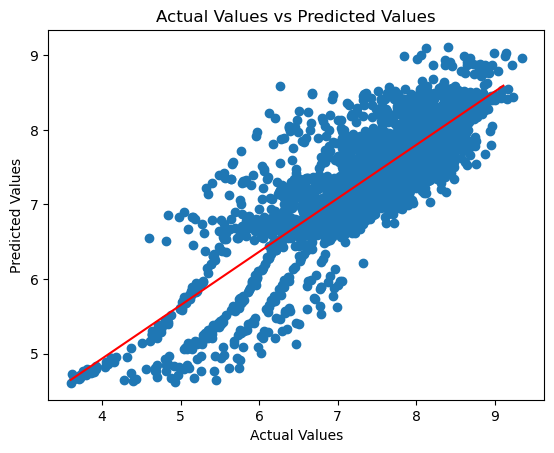

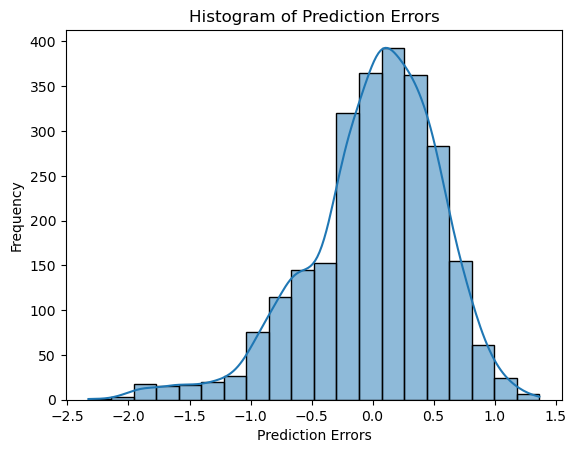

R2 Score  Adjusted R2 Score
Metrics  0.711607           0.708067

In [77]:
# Usage:
metrics = RegressionMetrics(y_test, test_pred,len(X_train.columns))
metrics.plot_actual_vs_predicted()
metrics.plot_prediction_errors()
linear_summary_df = metrics.summary()
linear_summary_df

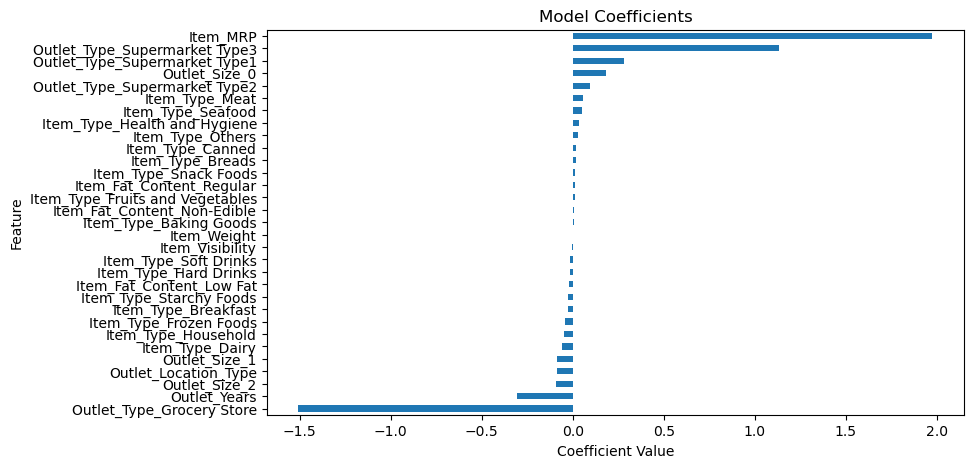

In [78]:
# Set the figure size (width, height) in inches
plt.figure(figsize=(9,5))

coef = pd.Series(lrr.coef_, X_train.columns).sort_values()
ax = coef.plot(kind='barh', title="Model Coefficients") # Use 'barh' for horizontal bars
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.savefig('model_coefficients.png') # Save the plot to a file
plt.show()

In [79]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
# Make predictions on the testing data
y_pred = regressor.predict(X_test)

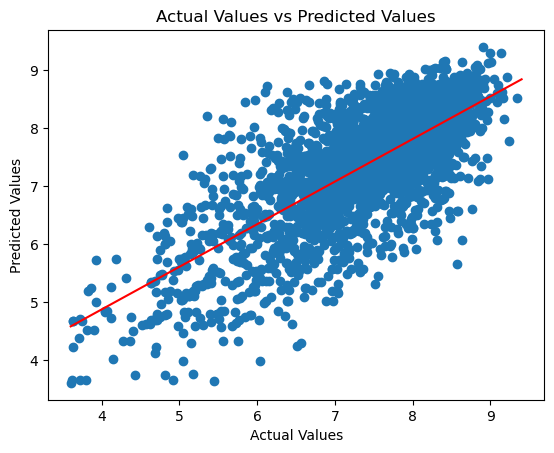

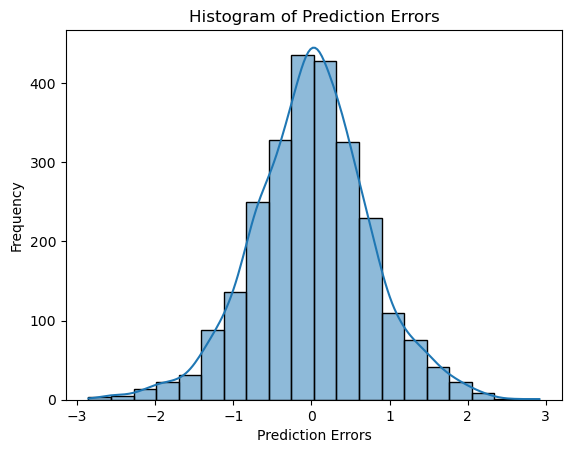

R2 Score  Adjusted R2 Score
Metrics  0.445521           0.438713

In [81]:
metrics = RegressionMetrics(y_test, y_pred,len(X_train.columns))
metrics.plot_actual_vs_predicted()
metrics.plot_prediction_errors()
dt_summary_df = metrics.summary()
dt_summary_df

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
RandomForest = RandomForestRegressor()

# Fit the model to the training data
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
# Make predictions on the testing data
RF_pred = RandomForest.predict(X_test)

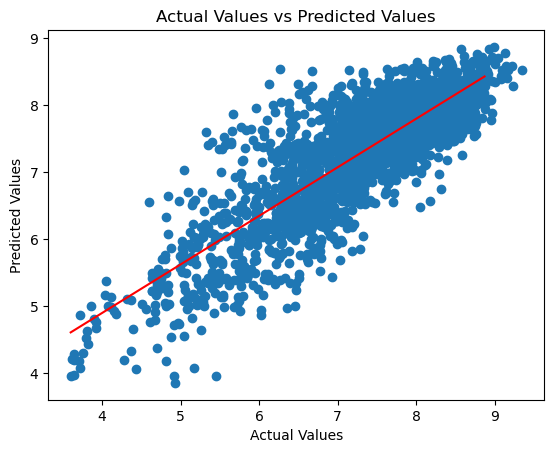

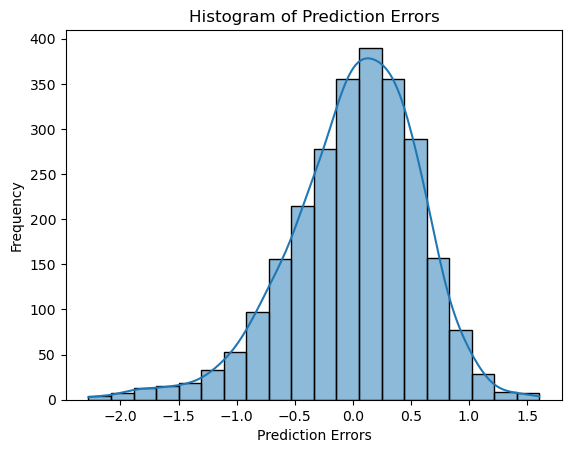

R2 Score  Adjusted R2 Score
Metrics  0.693148           0.689381

In [84]:
metrics = RegressionMetrics(y_test, RF_pred,len(X_train.columns))
metrics.plot_actual_vs_predicted()
metrics.plot_prediction_errors()
RF_summary_df = metrics.summary()
RF_summary_df

In [85]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors(KNN) regressor
KNN = KNeighborsRegressor()

# Fit the model to the training data
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [86]:
# Make predictions on the testing data
KNN_pred = KNN.predict(X_test)

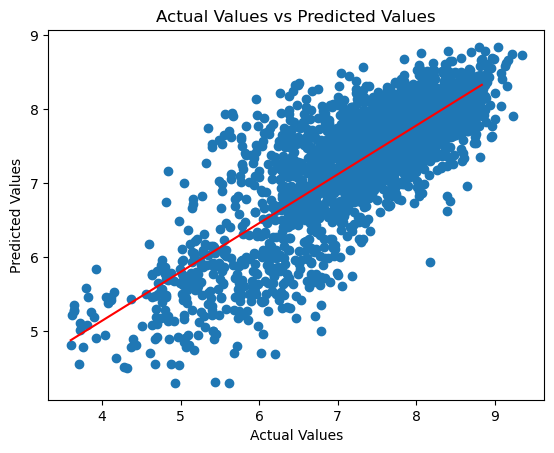

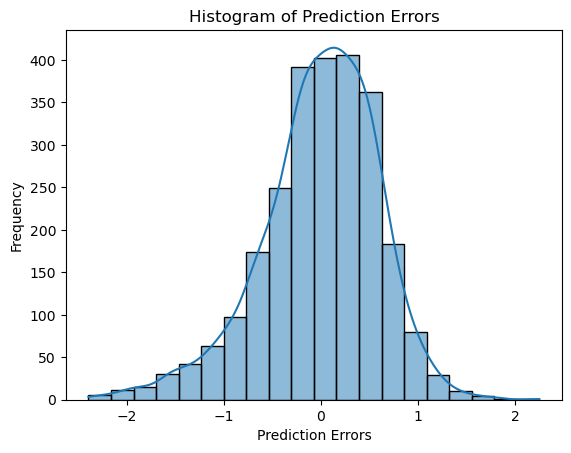

R2 Score  Adjusted R2 Score
Metrics  0.635054           0.630574

In [87]:
metrics = RegressionMetrics(y_test, KNN_pred,len(X_train.columns))
metrics.plot_actual_vs_predicted()
metrics.plot_prediction_errors()
KNN_summary_df = metrics.summary()
KNN_summary_df

In [88]:
from sklearn.svm import SVR

In [89]:
svm_regressor = SVR()
#kernel='linear', C=1.0, epsilon=0.1

In [90]:
svm_regressor.fit(X_train, y_train)

SVR()

In [91]:
# Make predictions on the testing data
SVR_pred = svm_regressor.predict(X_test)

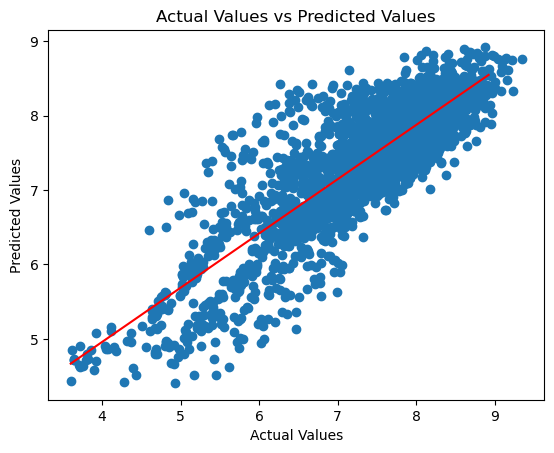

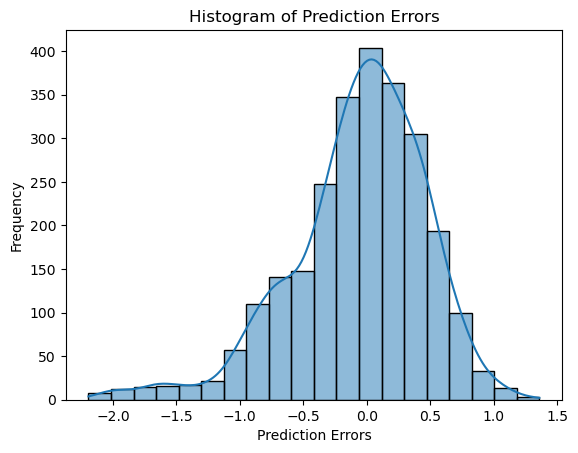

R2 Score  Adjusted R2 Score
Metrics  0.716137           0.712652

In [92]:
metrics = RegressionMetrics(y_test, SVR_pred,len(X_train.columns))
metrics.plot_actual_vs_predicted()
metrics.plot_prediction_errors()
SVR_summary_df = metrics.summary()
SVR_summary_df